In [1]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Please install GPU version of TF
Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\Elmer\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elmer\miniconda3\envs\tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 80s 262ms/step - accuracy: 0.7415 - loss: 0.4986 - val_accuracy: 0.8780 - val_loss: 0.3022
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\Elmer\miniconda3\envs\tf\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


301/301 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 0.8754 - loss: 0.3017 - val_accuracy: 0.8880 - val_loss: 0.2480
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 36s 120ms/step - accuracy: 0.8881 - loss: 0.2633 - val_accuracy: 0.9000 - val_loss: 0.2320
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 36s 120ms/step - accuracy: 0.8916 - loss: 0.2485 - val_accuracy: 0.9080 - val_loss: 0.2226
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.8961 - loss: 0.2304 - val_accuracy: 0.9100 - val_loss: 0.2191
Epoch 10/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9127 - loss: 0.2248
Test Loss: 0.2191
Test Accuracy: 0.9100


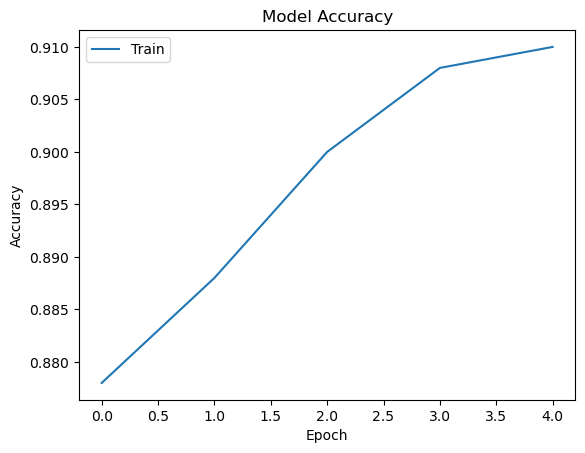

In [2]:
# Check if GPU is available and if so, set it as the default device
if tf.test.is_gpu_available():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Set up the paths to the train and test folders
train_folder = 'datasets/train'
test_folder = 'datasets/test'
saved_model_path = 'model/saved_model.h5'

# Check if a saved model exists, if not, train the model
if os.path.exists(saved_model_path):
    model = load_model(saved_model_path)
else:
    # Push the training to the GPU
    with tf.device('/GPU:0'):
    # Build the model Preprocess the images and labels
        image_size = (128, 128)
        batch_size = 32

        train_data_generator = ImageDataGenerator(rescale=1./255)
        test_data_generator = ImageDataGenerator(rescale=1./255)

        train_generator = train_data_generator.flow_from_directory(
            train_folder,
            target_size=image_size,
            batch_size=batch_size,
            class_mode='binary'
        )

        test_generator = test_data_generator.flow_from_directory(
            test_folder,
            target_size=image_size,
            batch_size=batch_size,
            class_mode='binary',
            shuffle=False
        )

        # Build the model
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        epochs = 10

        history = model.fit(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=epochs,
            validation_data=test_generator,
            validation_steps=len(test_generator)
        )

        # Save the trained model
        model.save(saved_model_path)

        # Evaluate the model
        test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')

        # Plot the training history
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')